### Import the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np

### Read in and display the image

(450, 660, 3)


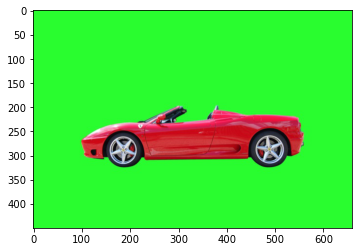

In [4]:
#read in the image
image = mpimg.imread('images/car_green_screen.jpg')

#print out the shape of the image
print(image.shape)
plt.imshow(image)

image_copy = np.copy(image)


### Define the color threshold

In [6]:
# Define our color selection bounderies
under_green = np.array([0,230,0])
upper_green = np.array([70,255,70])


### Create a mask

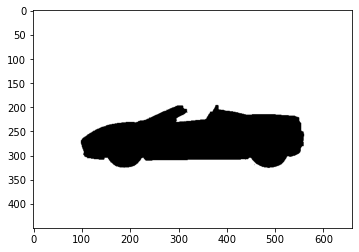

In [7]:
#creat a mask separate the shape of the object with the background
mask = cv2.inRange(image_copy, under_green, upper_green)
plt.imshow(mask, cmap= 'gray')

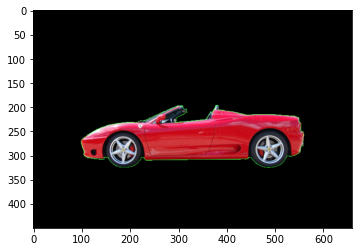

In [9]:
#apply the mask to the object
masked_image = np.copy(image_copy)
masked_image[mask!=0] = [0,0,0]
plt.imshow(masked_image)

### Background

(575, 1024, 3)


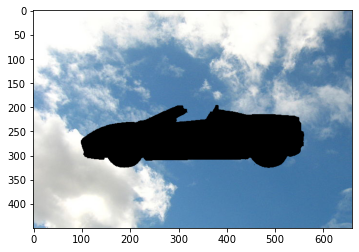

In [11]:
#load in the background
background = mpimg.imread('images/sky.jpg')
print(background.shape)
background_crop = np.copy(background)

# crop the size of the background to fit with the size of the upper image
background_crop = background_crop[0:450, 0:660]

#apply the mask to the background
background_crop_copy = np.copy(background_crop)
background_crop_copy[mask==0] = [0,0,0]
plt.imshow(background_crop_copy)


### Final result

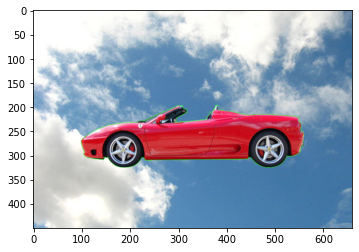

In [12]:
pic = background_crop_copy + masked_image
plt.imshow(pic)